In [1]:
import sys
sys.path.insert(1, r'C:\Users\ewais\Documents\GitHub\tensor-hero\Model_1')
import torch
import numpy as np
from model import *

# Convert notes output from model 1 to notes arrays
def m1_tensor_to_note_array(output):
    '''
    m1 tensors are returned from model 1.
    not currently designed to handle batches.

    ~~~~ ARGUMENTS ~~~~
    output : torch tensor
    -   output from model 1, e.g. tensor([])

    ~~~~ RETURNS ~~~~
    notes_array : numpy array
    -   shape = (<song length in seconds * 100>,)
    -   indices represent time in 10ms bins, values represent notes
    '''
    output = output.detach().cpu().numpy()
    # Remove padding, <sos>, <eos>
    output = np.delete(output, np.where(output == 432))
    output = np.delete(output, np.where(output == 434))

    # Detect the properly formatted pairs of output, i.e. (time, note)
    note_vals = list(range(32))
    time_vals = list(range(32,432))
    # Loop through the array two elements at a time
    pairs = []
    for i in range(output.shape[0]-1):
        pair = (output[i], output[i+1])
        if pair[0] in time_vals and pair[1] in note_vals:
            pairs.append(pair)

    # Create notes array
    notes_array = np.zeros(400)
    for pair in pairs:
        notes_array[pair[0]-32] = pair[1]
    print(notes_array)

    return notes_array

# Define model

test_output = torch.tensor([433,   1, 113,   1, 128,   2, 128,  12, 135,  12, 147,  12, 159,  12,
        187,  12, 187,  12, 191,  12, 205,  12, 214,  12, 245,  12, 268,  12,
        276,  12, 293,  12, 307,  12, 318,  12, 318,  12, 343,  12, 359,  12,
        363,  12, 433,  12, 433,  10, 433,  10, 433, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434,
        434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434])
print(f'test output length {test_output.shape[0]}')
notes = m1_tensor_to_note_array(test_output)
print(notes)



test output length 350
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 12.  0.  0.  0.  0.  0.  0. 12.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12.  0.  0.  0. 12.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12.  0.  0.  0.  0.  0.  0.
  0.  0. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 12.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. 12.  0.  0.  0.  0.

## Song preprocessing

In [2]:
sys.path.insert(1,r'C:\Users\ewais\Documents\GitHub\tensor-hero\Shared_Functionality\Preprocessing\Preprocessing Functions')
from audio_functions import *

def m1_song_preprocessing(song_path):
    '''
    Loads the song (song.ogg) at song_path and converts it to an array of spectrograms with shape = (<song length in seconds / 4>, frequence (512), time (400)).
    If song length is not divisible by 4, pads the end of the song

    ~~~~ ARGUMENTS ~~~~
    - song_path : Path or String
        - path to song
    
    ~~~~ RETURNS ~~~~
    - full_spec : numpy array
        - full spectrogram split into 4 second segments
    '''
    spec = compute_mel_spectrogram(song_path)

    # Pad so the length is divisible by 400
    spec = np.pad(spec, ((0,0),(0,400-(spec.shape[1]%400))), mode='constant', constant_values=-80.0)
    spec = (spec+80)/80  # normalize

    # Populate full spectrogram
    full_spec = np.zeros(shape=(int(spec.shape[1]/400), 512, 400))
    assert (spec.shape[1]/400)%1 < 1e-8, 'Error: Spectrogram has been padded to the wrong length'
    for i in range(int(spec.shape[1]/400)):
        full_spec[i,...] = spec[:,(i*400):((i+1)*400)]

    return full_spec

sp = Path(r'X:\Training Data\Unprocessed\Angevil Hero II\1. Andy McKee - Ouray\song.ogg')
spectr = m1_song_preprocessing(sp)



In [ ]:
from librosa.display import specshow
spec = spectr
print(spec.shape)

# Pad so the length is divisible by 400
spec = np.pad(spec, ((0,0),(0,400-(spec.shape[1]%400))), mode='constant', constant_values=-80.0)
spec = (spec+80)/80  # normalize

# Define empty numpy array for full spectrogram
full_spec = np.zeros(shape=(int(spec.shape[1]/400), 512, 400))
assert (spec.shape[1]/400)%1 < 1e-8, 'Error: Spectrogram has been padded to the wrong length'
for i in range(int(spec.shape[1]/400)):
    full_spec[i,...] = spec[:,(i*400):((i+1)*400)]

print(full_spec.shape)
specshow(full_spec[20])

## Model inference

In [3]:
# Load model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device = {device}')

# Model hyperparameters
trg_vocab_size = 435  # <output length>
embedding_size = 512
num_heads = 8
num_encoder_layers = 2
num_decoder_layers = 2
dropout = 0.1
max_len = 500
forward_expansion = 2048

model = Transformer(
    embedding_size,
    trg_vocab_size,
    num_heads,
    num_encoder_layers,
    num_decoder_layers,
    forward_expansion,
    dropout,
    max_len,
    device,
).to(device)

model.load_state_dict(torch.load(r'C:\Users\ewais\Documents\GitHub\tensor-hero\Model_1\model4.pt'))
model.eval()


device = cuda


Transformer(
  (src_position_embedding): Embedding(500, 512)
  (trg_position_embedding): Embedding(500, 512)
  (trg_word_embedding): Embedding(435, 512)
  (src_word_embedding): ModuleList(
    (0): InputEmbedding(
      (linear): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): Sigmoid()
      )
    )
    (1): InputEmbedding(
      (linear): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): Sigmoid()
      )
    )
    (2): InputEmbedding(
      (linear): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): Sigmoid()
      )
    )
    (3): InputEmbedding(
      (linear): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): Sigmoid()
      )
    )
    (4): InputEmbedding(
      (linear): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): Sigmoid()
      )
    )
    (5): InputEmbedding(
      

100%|██████████| 500/500 [00:22<00:00, 21.89it/s]


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0

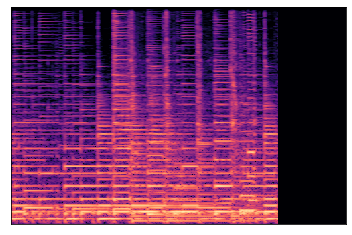

In [15]:
from librosa.display import specshow
from tqdm import tqdm

def predict(model, device, input, sos_idx, max_len):
    '''
    Predicts the output sequence for a single input spectrogram

    ~~~~ ARGUMENTS ~~~~
    - model : PyTorch model
        - Transformer architecture, takes len 400 spectrograms as input
        - Model should already be on device
    - device : str
        - cuda or cpu
    - input : numpy array
        - spectrogram
        - shape = (512, 400)
    - sos_idx : int
        - start of sequence index
    - max_len : int
        - max output sequence length

    ~~~~ RETURNS ~~~~
    - prediction : torch tensor
        - predicted output from model
    '''
    model.eval()

    # Pad spectrogram
    input = np.pad(input,
                   ((0, 0), (0, max_len-input.shape[1])),
                   'constant',
                   constant_values = 0)
    specshow(input)
    # Convert input to torch tensor
    input = torch.tensor(input, dtype=torch.float).to(device)
    # Add batch dimension
    input = input.unsqueeze(0)

    # Create initial input sequence, i.e. [<sos>]
    prediction = torch.tensor(np.array([sos_idx])).to(device)
    # Add batch dimension
    prediction = prediction.unsqueeze(0)

    for i in tqdm(range(max_len)):

        # Get output
        output = model(input, prediction)
        pred = torch.tensor([torch.argmax(output[0,-1,:]).item()]).unsqueeze(0).to(device)
        prediction = torch.cat((prediction, pred), dim=1)
        # print(torch.argmax(output[0,-1,:]).item())

        # if i > 0 and torch.argmax(output[0,-1,:]).item() == 433:
            # print('final predicted output:')
            # print(prediction)
            # break
    
    return prediction

full_spec = spectr
input = full_spec[15]
prediction = predict(model, device, input, sos_idx=432, max_len=500)
notes_array = m1_tensor_to_note_array(prediction)

print(notes_array)

## notes arrays to chart file

In [ ]:
# Convert notes array to strings representing note events
notes_to_chart_strings = {
    1 : ['0'],
    2 : ['1'],
    3 : ['2'],
    4 : ['3'], 
    5 : ['4'],
    6 : ['0','1'],
    7 : ['0','2'],
    8 : ['0','3'],
    9 : ['0','4'],
    10 : ['1','2'],
    11 : ['1','3'],
    12 : ['1','4'],
    13 : ['2','3'],
    14 : ['2','4'],
    15 : ['3','4'],
    16 : ['0','1','2'],
    17 : ['0','1','3'],
    18 : ['0','1','4'],
    19 : ['0','2','3'],
    20 : ['0','2','4'],
    21 : ['0','3','4'],
    22 : ['1','2','3'],
    23 : ['1','2','4'],
    24 : ['1','3','4'],
    25 : ['2','3','4'],
    26 : ['0','1','2','3'],
    27 : ['0','1','2','4'],
    28 : ['0','1','3','4'],
    29 : ['0','2','3','4'],
    30 : ['1','2','3','4'],
    31 : ['0','1','2','3','4'],
    32 : ['7']
}



In [ ]:
# Parse the 'song' section of the .chart file to get relevent chart information
song_metadata = {'Name' : 'test song',
                 'Artist' : 'some artist',
                 'Charter' : 'tensorhero',
                 'Offset' : 0,
                 'Resolution' : 192,
                 'Genre' : 'electronic',
                 'MediaType' : 'cd',
                 'MusicStream' : 'song.ogg'}

f = open('new song.chart', 'w')

# populate '[Song]' portion of file
f.writelines(['[Song]\n', '{\n'])
for k, v in song_metadata.items():
    if k in ['Name', 'Artist', 'Charter', 'Album', 'Year', 'Genre', 'MediaType', 'MusicStream']:
        f.writelines('  ' + k + ' = "' + str(v) + '"\n')
    else:
        f.writelines('  ' + k + ' = ' + str(v) + '\n')
f.writelines('}\n')

# Populate '[SyncTrack]' portion of file, skip [Events]
f.writelines('[SyncTrack]\n{\n  0 = TS 1\n  0 = B 31250\n}\n[Events]\n{\n}\n')

# Populate notes in '[ExpertSingle]'
f.writelines('[ExpertSingle]\n{\n')

# Fill in notes from notes array
for idx, note in enumerate(notes_array):
    if note == 0: # ignore no note is present
        continue
    for n in notes_to_chart_strings[note]:
        f.writelines('  ' + str(idx) + ' = ' + 'N ' + n + ' 0\n')
f.writelines('}')
f.close()